# 필요한 패키지 호출

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd


# CSV 파일에서 데이터셋을 로드

In [2]:
file_path = '/content/1.01.house.price.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,ID,평수,연식,가격
0,1,34,5,5.0
1,2,25,5,2.5
2,3,30,2,4.0
3,4,38,20,3.0
4,5,44,12,3.3


# 데이터셋을 PyTorch 텐서로 변환

In [ ]:
X = torch.tensor(data[['평수', '연식']].values, dtype=torch.float32)
y = torch.tensor(data['가격 '].values, dtype=torch.float32).view(-1, 1)

In [ ]:
print(X)

tensor([[34.,  5.],
        [25.,  5.],
        [30.,  2.],
        [38., 20.],
        [44., 12.],
        [48., 18.],
        [52., 22.],
        [60., 19.],
        [34., 18.],
        [34., 22.]])


# 데이터 정규화. 데이터의 스케일 조정
표준화(Z-Score 정규화): 데이터를 평균이 0이고 표준편차가 1인 분포로 변환

In [ ]:
X_norm = (X - X.mean(dim=0)) / X.std(dim=0)
print(X_norm)

tensor([[-0.5434, -1.2118],
        [-1.3724, -1.2118],
        [-0.9118, -1.6027],
        [-0.1750,  0.7427],
        [ 0.3776, -0.2997],
        [ 0.7461,  0.4821],
        [ 1.1145,  1.0033],
        [ 1.8513,  0.6124],
        [-0.5434,  0.4821],
        [-0.5434,  1.0033]])


# 모델(선형 회귀) 정의

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)  # 입력 차원은 2 ('평수'와 '연식'), 출력 차원은 1 ('가격')

    def forward(self, x):
        return self.linear(x)

In [ ]:
# 인스턴스 생성
model = LinearRegressionModel()

In [ ]:
# 손실 함수로 평균 제곱 오차(MSE)를 사용
criterion = nn.MSELoss()

In [ ]:
# 최적화 알고리즘으로 SGD를 사용, 학습률은 0.001로 설정
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 1000
for epoch in range(num_epochs):
    # Variable로 데이터를 감싸 계산 그래프를 구성.
    inputs = Variable(X_norm)
    targets = Variable(y)

    # 순전파 단계: 예측값을 계산.
    outputs = model(inputs)
    # 손실을 계산.
    loss = criterion(outputs, targets)

    # 역전파 단계: 기울기를 초기화하고, 손실에 대한 기울기를 계산한 다음, 최적화 단계를 수행.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 일정한 에포크마다 현재의 손실을 출력.
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 9.9314
Epoch [200/1000], Loss: 6.7695
Epoch [300/1000], Loss: 4.6522
Epoch [400/1000], Loss: 3.2332
Epoch [500/1000], Loss: 2.2814
Epoch [600/1000], Loss: 1.6423
Epoch [700/1000], Loss: 1.2127
Epoch [800/1000], Loss: 0.9235
Epoch [900/1000], Loss: 0.7285
Epoch [1000/1000], Loss: 0.5968


In [ ]:
# 모델 평가 단계: 학습된 모델을 사용하여 첫 번째 데이터 포인트의 가격을 예측.
model.eval()
with torch.no_grad():
    predicted = model(Variable(X_norm[0]))
    # 정규화된 예측값을 원래 스케일로 되돌립니다.
    predicted_price = predicted.item() * y.std() + y.mean()
    print(f'첫 번째 아파트의 예측 가격: {predicted_price:.4f}, 실제 가격: {y[0].item():.4f}')

첫 번째 아파트의 예측 가격: 7.6058, 실제 가격: 5.0000


In [ ]:
# 훈련된 모델의 매개변수를 출력.
print(f'모델의 가중치: {model.linear.weight}')
print(f'모델의 편향: {model.linear.bias}')


모델의 가중치: Parameter containing:
tensor([[ 0.9469, -0.4519]], requires_grad=True)
모델의 편향: Parameter containing:
tensor([3.3451], requires_grad=True)


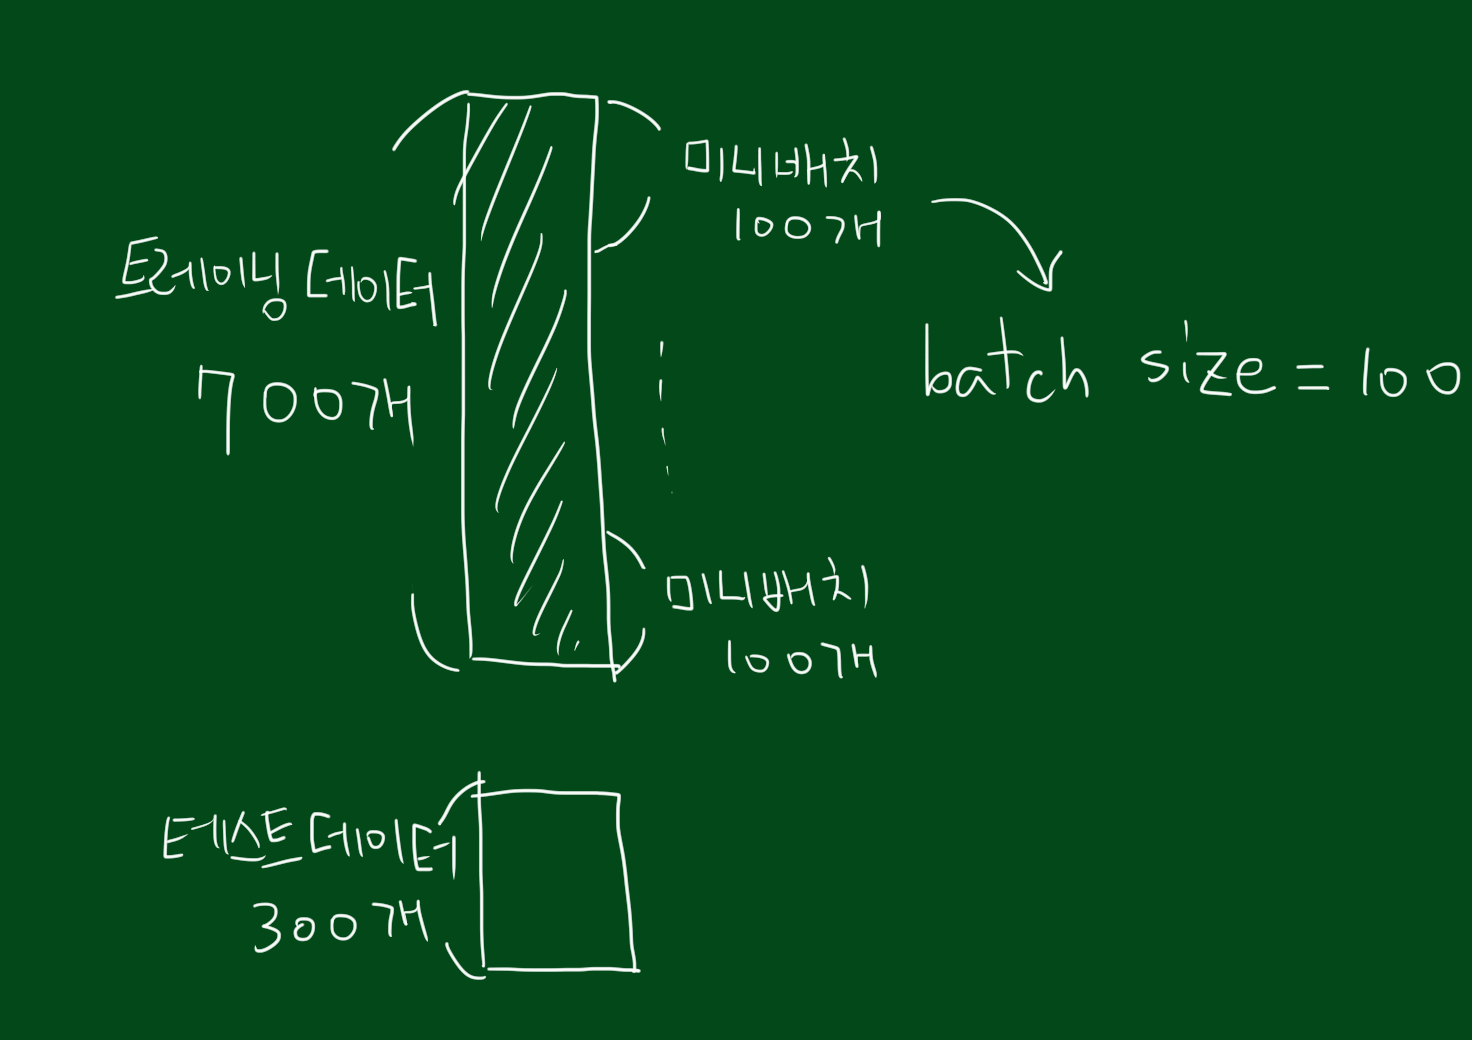

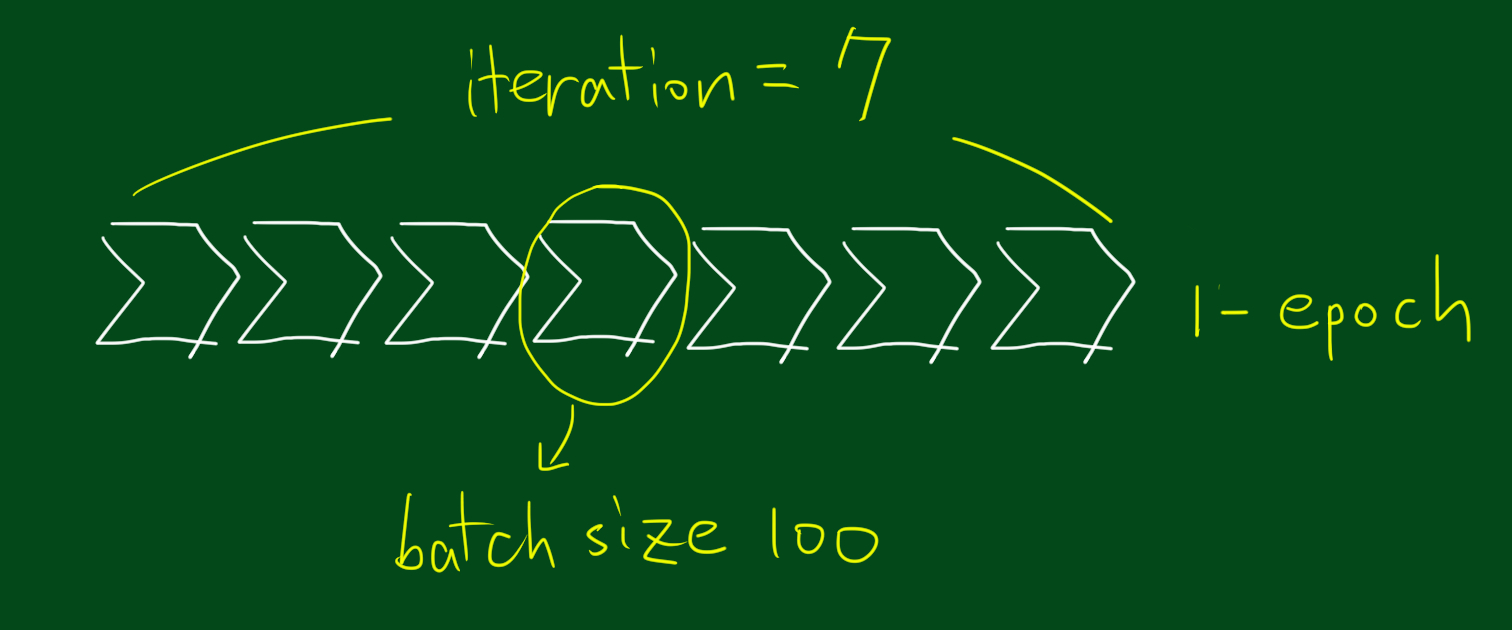